In [0]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [0]:
#setting the constants to a variable for ease of coding
#given as h^-1 (aka decay per hour)
k1 = 1.7e-3   #PCE decay rate
k2 = 3.1e-3   #TCE decay rate 
k3 = 1.2e-3   #cDCE decay rate 
k4 = 6.2e-3   #TCA decay rate 

# Define the function that defines the ODE
# Consider this as f(y,t) or y'
def rateFunction(t,y):
    f = numpy.array([-k1*y[0], k1*y[0] - k2*y[1], k2*y[1] - k3*y[2], k3*y[2] - k4*y[3]])
    return(f)

The approximation of PCE is 0.004420434950544378.
The approximation of TCE is 0.0026286879270390573.
The approximation of cDCE is 0.002368029048124247.
The approximation of TCA is 0.00029220445376904806.


Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

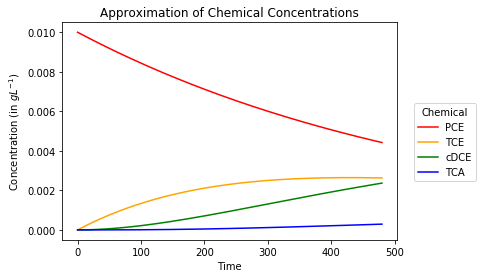

In [0]:
#first order explicit Euler's

# Define the basic parameters
N = 960     # The number of steps
startTime = 0.0    # The initial time
endTime = 20.0*24.0   # The time to stop the approximation
initialY  = 0      # The initial value

# Define the variables that are used in the approximation.
dt = (endTime - startTime)/N
time = numpy.linspace(startTime,endTime,N+1)
y = numpy.zeros((4 , N+1))
y[:, 0] = numpy.array([.01, 0, 0, 0])

for lupe in range(1,N+1):
    y[:, lupe] = y[:, lupe-1] + dt*rateFunction(time[lupe-1],y[:, lupe-1])
    
# Print out the results at the final time.
print("The approximation of PCE is {1}.".format(time[N],y[0, N]))
print("The approximation of TCE is {1}.".format(time[N],y[1, N]))
print("The approximation of cDCE is {1}.".format(time[N],y[2, N]))
print("The approximation of TCA is {1}.".format(time[N],y[3, N]))


# Make a plot of the approximation and the true value.
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

#true_time = numpy.linspace(startTime,endTime,200)
plt1 = axes.plot(time, y[0, :], 'r', label = 'PCE')
plt2 = axes.plot(time, y[1, :],'orange', label = "TCE")
plt3 = axes.plot(time, y[2, :],'g', label = "cDCE")
plt3 = axes.plot(time, y[3, :],'b', label = "TCA")
plt.legend(title = "Chemical", bbox_to_anchor=(1.25, .65))
plt.title("Approximation of Chemical Concentrations")
plt.xlabel("Time")
plt.ylabel("Concentration (in $gL^{-1}$)")

Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

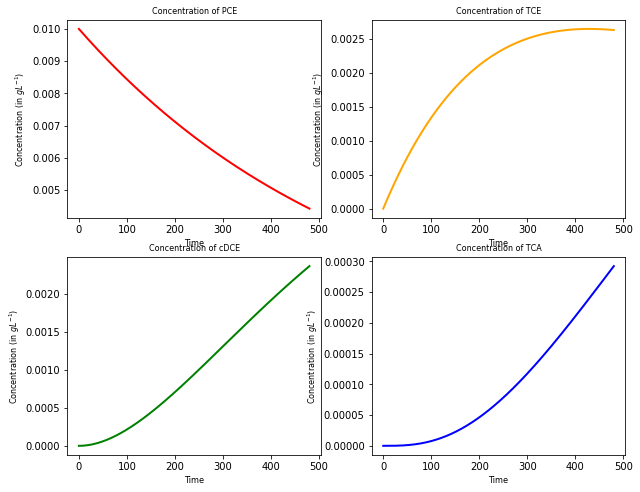

In [0]:
#Individual plots for 1st order Euler's

titlesize = 8
fontsize = 8
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.plot(time, y[0, :], 'r', linewidth = 2)
plt.title("Concentration of PCE", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

plt.subplot(222)
plt.plot(time, y[1, :], 'orange', linewidth = 2)
plt.title("Concentration of TCE", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

plt.subplot(223)
plt.plot(time, y[2, :], 'g', linewidth = 2)
plt.title("Concentration of cDCE", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

plt.subplot(224)
plt.plot(time, y[3, :], 'b', linewidth = 2)
plt.title("Concentration of TCA", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

The approximation of PCE is 0.0044219695275787806.
The approximation of TCE is 0.0026273860175901487.
The approximation of cDCE is 0.002367031735331869.
The approximation of TCA is 0.00029220324156396246.


Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

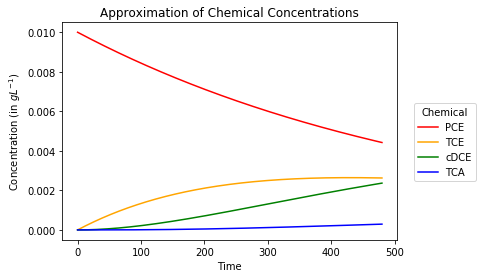

In [0]:
#2nd order Runge-Kutta

# Define the basic parameters
N = 960     # The number of steps
startTime = 0.0    # The initial time
endTime = 20.0*24.0   # The time to stop the approximation
initialY  = 0      # The initial value

# Define the variables that are used in the approximation.
dt = (endTime-startTime)/float(N)
time = numpy.linspace(startTime,endTime,N+1)
y = numpy.zeros((4 , N+1))
y[:, 0] = numpy.array([.01, 0, 0, 0])

# Now use a second order, explicit RK method to determine the approximation
# at the rest of the grid points.
for lupe in range(1,N+1):
    
    xi_1 = numpy.array([y[0, lupe - 1], y[1, lupe - 1], y[2, lupe - 1], y[3, lupe - 1]])
    f_1 = rateFunction(time[lupe - 1], xi_1)
    
    xi_2 = xi_1 + dt*f_1
    f_2  = rateFunction(time[lupe-1]+dt,xi_2)
    
    y[:,lupe] = y[:, lupe-1] + dt*0.5*(f_1+f_2)
    
# Print out the results at the final time.
print("The approximation of PCE is {1}.".format(time[N],y[0, N]))
print("The approximation of TCE is {1}.".format(time[N],y[1, N]))
print("The approximation of cDCE is {1}.".format(time[N],y[2, N]))
print("The approximation of TCA is {1}.".format(time[N],y[3, N]))


# Make a plot of the approximation and the true value.
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

#true_time = numpy.linspace(startTime,endTime,200)
plt1 = axes.plot(time, y[0, :], 'r', label = 'PCE')
plt2 = axes.plot(time, y[1, :],'orange', label = "TCE")
plt3 = axes.plot(time, y[2, :],'g', label = "cDCE")
plt3 = axes.plot(time, y[3, :],'b', label = "TCA")
plt.legend(title = "Chemical", bbox_to_anchor=(1.25, .65))
plt.title("Approximation of Chemical Concentrations")
plt.xlabel("Time")
plt.ylabel("Concentration (in $gL^{-1}$)")

Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

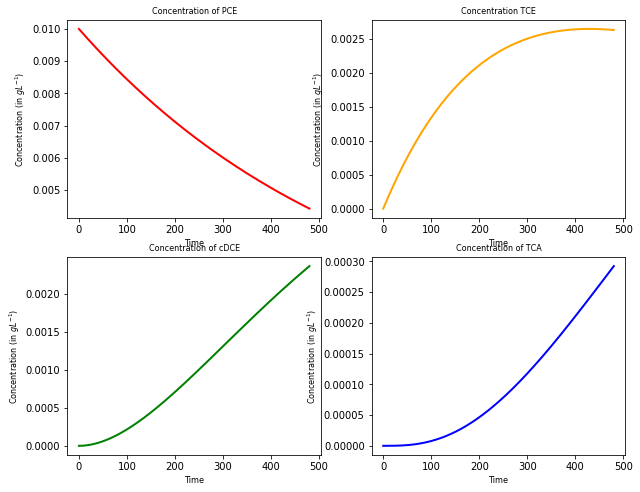

In [0]:
#Individual plots for 2nd order RK

titlesize = 8
fontsize = 8
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.plot(time, y[0, :], 'r', linewidth = 2)
plt.title("Concentration of PCE", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

plt.subplot(222)
plt.plot(time, y[1, :], 'orange', linewidth = 2)
plt.title("Concentration TCE", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

plt.subplot(223)
plt.plot(time, y[2, :], 'g', linewidth = 2)
plt.title("Concentration of cDCE", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

plt.subplot(224)
plt.plot(time, y[3, :], 'b', linewidth = 2)
plt.title("Concentration of TCA", fontsize = titlesize)
plt.xlabel("Time", fontsize = fontsize)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = fontsize)

In [0]:
#direct solve (maybe?) if using matrix per hour

mat = numpy.array([[-k1, 0, 0, 0],
                 [k1, -k2, 0, 0],
                 [0, k2, -k3, 0],
                 [0, 0, k3, -k4]])

y= numpy.array([.01, 0, 0, 0])

n=480

for i in range(0,n):
    y+=numpy.matmul(mat, y)

print(y)



In [0]:

#same as above but using per index instead of vector operations
#also h is variable 
#if h = 1, same as matrix method above 

n=480       #numintervals
pts = n+1   #number of xi or data points
hrs=480     #20days*24hours

h=hrs/n

y0= numpy.array([.01, 0, 0, 0])
y= numpy.zeros([pts,4])
y[0]=y0
y[1][0]=y[0][0]-k1*h*y[0][0]
y[1][1]=k1*h*y[0][0]
print(y[1])
y[2][0]=y[1][0]-k1*h*y[1][0]
y[2][1]=y[1][1]+(k1*h*y[1][0]-k2*h*y[1][1])
y[2][2]=k2*h*y[1][1]
print(y[2])
y[3][0]=y[2][0]-k1*h*y[2][0]
y[3][1]=y[2][1]+(k1*h*y[2][0]-k2*h*y[2][1])
y[3][2]=y[2][2]+(k2*h*y[2][1]-k3*h*y[2][2])
y[3][3]=k3*h*y[2][2]
print(y[3])

for i in range(4,481):
    y[i][0]=y[i-1][0]-k1*h*y[i-1][0]
    y[i][1]=y[i-1][1]+(k1*h*y[i-1][0]-k2*h*y[i-1][1])
    y[i][2]=y[i-1][2]+(k2*h*y[i-1][1]-k3*h*y[i-1][2])
    y[i][3]=y[i-1][3]+(k3*h*y[i-1][2]-k4*h*y[i-1][3])
    if i%10==0:
      print(y[i])

print(y[len(y)-1])
    


In [0]:
#2nd order Runge-Kutta

# Define the basic parameters
N = 24*120*2     # The number of steps
startTime = 0.0    # The initial time
endTime = 24*120.0   # The time to stop the approximation
initialY  = 0      # The initial value

# Define the variables that are used in the approximation.
dt = (endTime-startTime)/float(N)
time = numpy.linspace(startTime,endTime,N+1)
y = numpy.zeros((4 , N+1))
y[:, 0] = numpy.array([.01, 0, 0, 0])

# Now use a second order, explicit RK method to determine the approximation
# at the rest of the grid points.
for lupe in range(1,N+1):

    xi_1 = numpy.array([y[0, lupe - 1], y[1, lupe - 1], y[2, lupe - 1], y[3, lupe - 1]])
    f_1 = rateFunction(time[lupe - 1], xi_1)
    
    xi_2 = xi_1 + dt*f_1
    f_2  = rateFunction(time[lupe-1]+dt,xi_2)
    
    y[:,lupe] = y[:, lupe-1] + dt*0.5*(f_1+f_2)

    if y[0, lupe]<.0001:
      print(lupe)
      break
    
# Print out the results at the final time.

print("The approximation of PCE is {1}.".format(time[N],y[0, N]))
print("The approximation of TCE is {1}.".format(time[N],y[1, N]))
print("The approximation of cDCE is {1}.".format(time[N],y[2, N]))
print("The approximation of TCA is {1}.".format(time[N],y[3, N]))


# Make a plot of the approximation and the true value.
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

#true_time = numpy.linspace(startTime,endTime,200)
plt1 = axes.plot(time, y[0, :], 'r', label = 'PCE')
plt2 = axes.plot(time, y[1, :],'orange', label = "TCE")
plt3 = axes.plot(time, y[2, :],'g', label = "cDCE")
plt3 = axes.plot(time, y[3, :],'b', label = "TCA")
plt.legend(title = "Chemical", bbox_to_anchor=(1.25, .65))
plt.title("Approximation of Chemical Concentrations")
plt.xlabel("Time")
plt.ylabel("Concentration (in $gL^{-1}$)")

In [0]:
#4th order Runge-Kutta

# Define the basic parameters
N = 480     # The number of steps
startTime = 0.0    # The initial time
endTime = 20*24.0   # The time to stop the approximation
initialY  = 0      # The initial value

# Define the variables that are used in the approximation.
dt = (endTime-startTime)/float(N)
time = numpy.linspace(startTime,endTime,N+1)
y = numpy.zeros((4 , N+1))
y[:, 0] = numpy.array([.01, 0, 0, 0])
 
# Print out the results at the final time.
#t = numpy.linspace(0, 480, steps) #use time
#delta_t = t[1] - t[0]             #use dt
u_2 = numpy.zeros((4 , N+1))
u_4 = numpy.zeros((4, N+1))
u_2[:, 0] = numpy.array([.01, 0, 0, 0])
u_4[:, 0] = numpy.array([.01, 0, 0, 0])

for (n, t_n) in enumerate(time[1:]):
    #u_2[:, n+1] = u_2[:, n] + 0.5 * dt * rateFunction(t_n, u_2[n])
    #u_2[:, n+1] = u_2[:, n] + dt * rateFunction(t_n, u_2[n+1])
    y_1 = u_4[:,n]
    y_2 = u_4[:,n] + 0.5 * dt * rateFunction(t_n, y_1)
    y_3 = u_4[:,n] + 0.5 * dt * rateFunction(t_n + 0.5 * dt, y_2)
    y_4 = u_4[:,n] + dt * rateFunction(t_n + 0.5 * dt, y_3)
    u_4[:, n+1] = u_4[:,n] + dt / 6.0 * (rateFunction(t_n, y_1) + 2.0 * rateFunction(t_n + 0.5 * dt, y_2) + 2.0 * rateFunction(t_n + 0.5 * dt, y_3))
print("The approximation of PCE is {1}.".format(time[N],u_4[0, N]))
print("The approximation of TCE is {1}.".format(time[N],u_4[1, N]))
print("The approximation of cDCE is {1}.".format(time[N],u_4[2, N]))
print("The approximation of TCA is {1}.".format(time[N],u_4[3, N]))


print(u_4[len(u_4)-1])
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

#axes.plot(t_exact, u_exact, 'k', label="True")
#axes.plot(t, u_2, 'ro', label="2-Stage")
axes.plot(time, u_4[0,:], 'bo', label="PCE")
axes.legend(loc=1)

plt.show()
"""
#true_time = numpy.linspace(startTime,endTime,200)
plt1 = axes.plot(time, y[0, :], 'r', label = 'PCE')
plt2 = axes.plot(time, y[1, :],'orange', label = "TCE")
plt3 = axes.plot(time, y[2, :],'g', label = "cDCE")
plt3 = axes.plot(time, y[3, :],'b', label = "TCA")
plt.legend(title = "Chemical", bbox_to_anchor=(1.25, .65))
plt.title("Approximation of Chemical Concentrations")
plt.xlabel("Time")
plt.ylabel("Concentration (in $gL^{-1}$)")
"""